# Исследование по теме: Определение перспективного тарифа для телеком-компании

В данной работе я выступаю в роли аналитика компании «Мегалайн» — федерального оператора сотовой связи. Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.

Аналитический кейс - сделать предварительный анализ тарифов на небольшой выборке клиентов. В нашем распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

**Описание тарифов:**
- Тариф «Смарт»
Ежемесячная плата: 550 рублей
Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика
Стоимость услуг сверх тарифного пакета: 1. минута разговора: 3 рубля («Мегалайн» всегда округляет вверх значения минут и мегабайтов. Если пользователь проговорил всего 1 секунду, в тарифе засчитывается целая минута); 2. сообщение: 3 рубля; 3. 1 Гб интернет-трафика: 200 рублей.
- Тариф «Ультра»
Ежемесячная плата: 1950 рублей
Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
Стоимость услуг сверх тарифного пакета: 1. минута разговора: 1 рубль; 2. сообщение: 1 рубль; 3. 1 Гб интернет-трафика: 150 рублей.

**Примечание:
«Мегалайн» всегда округляет секунды до минут, а мегабайты — до гигабайт. Каждый звонок округляется отдельно: даже если он длился всего 1 секунду, будет засчитан как 1 минута.
Для веб-трафика отдельные сессии не считаются. Вместо этого общая сумма за месяц округляется в бо́льшую сторону. Если абонент использует 1025 мегабайт в этом месяце, с него возьмут плату за 2 гигабайта.**

## Изучение данных из файла

In [1]:
# Все библиотеки лучше импортировать в начале файла. Об этом говорится в стилевом гайде по питону
# В иследовании я буду использовать все библиотеки, которые были мной изучены в рамках обучения в Яндекс.Практикум
# Импортирую библиотеку pandas как главного инструмента для решения поставленных задач
import pandas as pd
# импортирую библиотеку seaborn как главного инструмента для визуализации
import seaborn as sns
# импортирую библиотеку matplotlib для визуализации
import matplotlib.pyplot as plt
# импортирую библиотеку scipy для выполнения статистических расчётов
from scipy import stats as st
import numpy as np

In [2]:
# открываем файлы, создаем фундаментальные переменные
df_calls = pd.read_csv('/datasets/calls.csv')
df_internet = pd.read_csv('/datasets/internet.csv')
df_messages = pd.read_csv('/datasets/messages.csv')
df_tariffs = pd.read_csv('/datasets/tariffs.csv')
df_users = pd.read_csv('/datasets/users.csv')

**Можем приступать к процессу первичного визуального изучения данных в пяти наборах данных согласно условиям кейса**

In [3]:
# рассмотрим первые пять строк во фрейме данных в переменной df_calls
df_calls.head()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


In [4]:
# посмотрим, для более полного первичного представления, последние его 10 строк
df_calls.tail(10)

,id,call_date,duration,user_id
202597,1499_210,2018-10-02,8.86,1499
202598,1499_211,2018-12-29,4.58,1499
202599,1499_212,2018-12-30,1.35,1499
202600,1499_213,2018-10-17,10.77,1499
202601,1499_214,2018-12-05,2.42,1499
202602,1499_215,2018-12-26,0.76,1499
202603,1499_216,2018-10-18,18.83,1499
202604,1499_217,2018-11-10,10.81,1499
202605,1499_218,2018-10-06,4.27,1499
202606,1499_219,2018-12-14,19.62,1499


<div class="alert alert-info"> <b>Комментарий:</b> В ходе первичного осмотра датафрейма df_calls наблюдаются следующие его недостатки и положительные стороны:

*1. присутсвует столбец, который позволяет идентифицировать каждый уникальный звонок. Нумерация 'id' с нижним подчеркаванием, следовательно есть вопросы к правильному использованию типов данных, это минус;*

*2.  Наименования атрибутов представлены в хорошем стиле, 'змеинный регистр' соблюден, это плюс;*
    
*3. Значения NaN (отсутствующее в ячейке число) и значения None (нечисловой тип 'NoneType')  при первичном осмотре не установлены, это плюс,  но совсем исключать этот вопрос нельзя, необходимо убедиться*.

</div>

In [5]:
# пришло время получить общую информацию о данных в таблице df_calls
df_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


**Информация из описания данных**

*Таблица calls (информация о звонках):*
- id — уникальный номер звонка
- call_date — дата звонка
- duration — длительность звонка в минутах
- user_id — идентификатор пользователя, сделавшего звонок

<div style="border:solid DarkCyan 3px; padding: 20px"> Сравним информацию о фрейме данных df_calls с информацияей из описания и определим первые важные выводы для дальнейшей работы. Общее описание содержит сведения, что в фрейме данных df_calls 4-ре столбца и 202607 строк:

1) по типу данных столбец id — уникальный номер звонка представлен в строчных данных как object, в рамках исследования наиболее удобный тип для проведения анализа данных является целочисленный тип - int64;
    
2) call_date — дата звонка, тип данных указан object, наиболее предпочтительный тип - date.
    
3) duration — длительность звонка в минутах, тип данных float64, при этом помним, что по условию задачи «Мегалайн» всегда округляет вверх значения минут и мегабайтов. Если пользователь проговорил всего 1 секунду, в тарифе засчитывается целая минута!
    
4) user_id — идентификатор пользователя, сделавшего звонок представлен целочисленным значением, что представляется оправданным.
</div>

In [6]:
# следующий на очереди датафрейм df_internet
# рассмотрим первые пять строк во фрейме данных в переменной df_internet
df_internet.head()

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


In [7]:
# посмотрим последние 10 строк
df_internet.tail(10)

,Unnamed: 0,id,mb_used,session_date,user_id
149386,149386,1499_147,0.00,2018-10-21,1499
149387,149387,1499_148,268.19,2018-11-13,1499
149388,149388,1499_149,778.68,2018-11-24,1499
149389,149389,1499_150,273.98,2018-11-20,1499
149390,149390,1499_151,752.72,2018-10-11,1499
149391,149391,1499_152,318.90,2018-10-03,1499
149392,149392,1499_153,490.13,2018-12-14,1499
149393,149393,1499_154,0.00,2018-10-27,1499
149394,149394,1499_155,1246.32,2018-11-26,1499
149395,149395,1499_156,544.37,2018-10-26,1499


<div class="alert alert-info"> <b>Комментарий:</b> В ходе первичного осмотра датафрейма df_internet наблюдаются следующие его недостатки и положительные стороны:

*1. присутсвует столбец, который позволяет идентифицировать каждый уникальное Интренет соединение. Нумерация 'id' с нижним подчеркаванием, следовательно есть вопросы к правильному использованию типов данных, это минус;*

*2.  Наименования атрибутов представлены в хорошем стиле, 'змеинный регистр' соблюден, это плюс;*
    
*3. Значения NaN (отсутствующее в ячейке число) и значения None (нечисловой тип 'NoneType')  при первичном осмотре не установлены, это плюс, но совсем исключать этот вопрос нельзя, необходимо убедиться;*

*4. Есть столбец df_internet,  необходимо выяснить его роль в исследовании, возможно он является следствием случайной ошибки. Это минус.* 

</div>

In [8]:
# посмотрим общую информацию о данных в таблице df_internet
df_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


**посмотрим интересующее нас описание таблицы internet (информация об интернет-сессиях):**

*Таблица internet (информация об интернет-сессиях):*
- id — уникальный номер сессии
- mb_used — объём потраченного за сессию интернет-трафика (в мегабайтах)
- session_date — дата интернет-сессии
- user_id — идентификатор пользователя

<div style="border:solid DarkCyan 3px; padding: 20px"> Сравним информацию о фрейме данных df_internet с информацияей из описания и определим первые важные выводы для дальнейшей работы. Общее описание содержит сведения, что в фрейме данных df_internet 5-ть столбцов и 149396 строк:

1) с учетом того, что в описании таблицы   df_internet  представлены 4 столбца, представляется первичное заключение о наличии df_internet столбца оправданным, значит столбец подлежит удалению, никаких негативных последствий для исседования это действие не повлечет;

2) по типу данных столбец id — уникальный номер сессии представлен в строчных данных как object, в рамках исследования наиболее удобный тип для проведения анализа данных является целочисленный тип - int64;
    
3) mb_used — объём потраченного за сессию интернет-трафика (в мегабайтах), тип данных указан float, помним примечание, что по веб-трафику отдельные сессии не считаются. Вместо этого общая сумма за месяц округляется в бо́льшую сторону. Если абонент использует 1025 мегабайт в этом месяце, с него возьмут плату за 2 гигабайта;
    
4) session_date — дата интернет-сессии, тип данных указан object, требуется замена на date.
    
5) user_id — идентификатор пользователя, сделавшего звонок представлен целочисленным значением, что представляется оправданным.
</div>

In [9]:
# приступим к рассмотрению следующего по очереди фрейма данных - df_messages
df_messages.head()

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


In [10]:
# посмотрим последние строки
df_messages.tail(10)

,id,message_date,user_id
123026,1499_174,2018-12-14,1499
123027,1499_175,2018-10-09,1499
123028,1499_176,2018-12-17,1499
123029,1499_177,2018-12-30,1499
123030,1499_178,2018-10-25,1499
123031,1499_179,2018-12-12,1499
123032,1499_180,2018-09-28,1499
123033,1499_181,2018-09-27,1499
123034,1499_182,2018-11-15,1499
123035,1499_183,2018-11-16,1499


<div class="alert alert-info"> <b>Комментарий:</b> В ходе первичного осмотра датафрейма df_messages наблюдаются следующие его недостатки и положительные стороны:

*1. присутсвует столбец, который позволяет идентифицировать каждый уникальное Интренет соединение. Нумерация 'id' с нижним подчеркаванием, следовательно есть вопросы к правильному использованию типов данных, это минус;*

*2.  Наименования атрибутов представлены в хорошем стиле, 'змеинный регистр' соблюден, это плюс;*
    
*3. Значения NaN (отсутствующее в ячейке число) и значения None (нечисловой тип 'NoneType')  при первичном осмотре не установлены, это плюс, но совсем исключать этот вопрос нельзя, необходимо убедиться.*

</div>

In [11]:
# посмотрим общую информацию 
df_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


**информация из описания данных:**

*Таблица messages (информация о сообщениях):*
- id — уникальный номер сообщения
- message_date — дата сообщения
- user_id — идентификатор пользователя, отправившего сообщение


<div style="border:solid DarkCyan 3px; padding: 20px"> Сравним информацию о фрейме данных df_messages с информацияей из описания и определим первые важные выводы для дальнейшей работы. Общее описание содержит сведения, что в фрейме данных df_internet 3 столбца и 123035 строк:

1) по типу данных столбец id — уникальный номер сессии представлен в строчных данных как object, в рамках исследования наиболее удобный тип для проведения анализа данных является целочисленный тип - int64;
    
2) message_date — дата сообщения представлены данными в типе object, наиболее свойственными и подходящими по типу данных является  тип date;
       
3) user_id — идентификатор пользователя, сделавшего звонок представлен целочисленным значением, что представляется оправданным.
</div>

In [12]:
# следующий на рассмотрении фрейм данных - df_tariffs
df_tariffs.head()

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


<div class="alert alert-info"> <b>Комментарий:</b> В ходе первичного осмотра датафрейма df_tariffs наблюдаются следующие его недостатки и положительные стороны:

*1. фрейм данных df_tariffs представлен в двух строках, недостатков в данных не выявлено при первичном осмотре;*

*2.  Наименования атрибутов представлены в хорошем стиле, 'змеинный регистр' соблюден, это плюс.*

</div>

In [13]:
# посмотрим общую информацию 
df_tariffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


**сравним с описанием из условий**

*Таблица tariffs (информация о тарифах):*
- tariff_name — название тарифа
- rub_monthly_fee — ежемесячная абонентская плата в рублях
- minutes_included — количество минут разговора в месяц, включённых в абонентскую плату
- messages_included — количество сообщений в месяц, включённых в абонентскую плату
- mb_per_month_included — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)
- rub_per_minute — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)
- rub_per_message — стоимость отправки сообщения сверх тарифного пакета
- rub_per_gb — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)

<div style="border:solid DarkCyan 3px; padding: 20px"> Сравним информацию о фрейме данных df_tariffs с информацией из описания и определим первые важные выводы для дальнейшей работы. Общее описание содержит сведения, что в фрейме данных df_tariffs 8 столбцов и 2 строки:

1) по типу данных tariff_name — название тарифа не вызывает вопросов, сохраним - object;
    
2) rub_monthly_fee — ежемесячная абонентская плата в рублях представлена в типе в int64, математически считать можно, но... для показателя финансов наиболее точным типом расчетов будет float;
       
3) minutes_included — количество минут разговора в месяц, включённых в абонентскую плату, представлен в int64, что не вызывает вопросов;
   
4) messages_included — количество сообщений в месяц, включённых в абонентскую плату, представлен в int64, что не вызывает вопросов;
    
5) mb_per_month_included — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах), представлен в int64, что не вызывает вопросов;

6) rub_per_minute — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата) представлены в типе int64, как и раньше для показателя финансов наиболее точным типом расчетов полагаю тип - float;
    
7) rub_per_message — стоимость отправки сообщения сверх тарифного пакета представлен в типе - int64, наиболее точным типом финансов полагаю тип - float;
    
8) rub_per_gb — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта) представлен в типе - int64, наиболее точным и удобным для расчетов типом финансов полагаю тип - float.
</div>

In [14]:
# изучим последний фрейм данных df_users
df_users.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


In [15]:
# посмотрим последние 5 строк
df_users.tail(15)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
485,1485,34,NaN,Киров,Таисия,Сухова,2018-12-29,ultra
486,1486,35,NaN,Нижний Новгород,Матвей,Моргунов,2018-10-31,smart
487,1487,72,NaN,Кострома,Рудольф,Кириллов,2018-08-13,smart
488,1488,47,NaN,Новороссийск,Вадим,Филатов,2018-11-07,smart
489,1489,35,NaN,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart
490,1490,30,NaN,Москва,Радомир,Алесин,2018-04-03,smart
491,1491,56,NaN,Челябинск,Радислав,Андрейкин,2018-04-25,ultra
492,1492,63,NaN,Санкт-Петербург,Руслана,Артёменко,2018-06-26,smart
493,1493,71,NaN,Красноярск,Таисия,Ахматулина,2018-11-24,ultra
494,1494,62,NaN,Омск,Ренат,Андропов,2018-08-17,smart


<div class="alert alert-info"> <b>Комментарий:</b> В ходе первичного осмотра датафрейма df_user наблюдаются следующие его недостатки и положительные стороны:

*1. присутсвует столбец, который позволяет идентифицировать каждого пользователя.*

*2.  Наименования атрибутов представлены в хорошем стиле, 'змеинный регистр' соблюден, это плюс;*
    
*3. Значения NaN (отсутствующее в ячейке число) присутсвуют в столбце **churn_date**, при этом значения None (нечисловой тип 'NoneType')  при первичном осмотре не установлены, необходимо будет заполнять значения NaN.*

</div>

In [16]:
# посмотрим общую информацию 
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


**информация из описания данных:**

*Таблица users (информация о пользователях):*
    
- user_id — уникальный идентификатор пользователя
- first_name — имя пользователя
- last_name — фамилия пользователя
- age — возраст пользователя (годы)
- reg_date — дата подключения тарифа (день, месяц, год)
- churn_date — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)
- city — город проживания пользователя
- tarif — название тарифного плана

### Вывод

- необходимо проверить данные на наличие пропусков и дубликатов;
- в фрейме данных df_calls необходимо осуществить предобратку данных: 1) столбец id перевести в целочисленный тип - int64; 2) call_date перевести  в тип - datetime64.
- в фрейме данных df_internet необходимо осуществить предобратку данных: 1) удаление столбца 'Unnamed: 0'; 2)  столбец id  перевести в целочисленный тип - int64, убрав предварительно нижнее подчеркивание; 3) в столбце session_date меняем тип данных на datetime64; 
- в фрейме данных df_messages необходимо осуществить предобратку данных: 1)   тип данных столбец id перевести в  целочисленный тип - int64; 2) столбец message_date перевести в тип данных - datetime64; 
- в фрейме данных df_tariffs необходимо осуществить предобратку данных: 1) столбец rub_monthly_fee  перевести в тип float; 2) столбец rub_per_minute перевести в тип float; 3) столбец rub_per_message перевести в тип float; 4) столбец rub_per_gb перевести в тип float;
- в фрейме данных df_users необходимо: 1) заменить в столбце churn_date тип данных object на datetime64; пропущенные значения с учетом того, что на момент выгрузки данных тариф ещё действовал, полагаем заменить на значения даты на конец 2022 года. 2) в столбце  reg_date как тип данных object требует замены на datetime64.

## Предобработка данных

In [17]:
# проверим данные в фрейме df_calls на наличие пропусков
(df_calls.isna().sum())

id           0
call_date    0
duration     0
user_id      0
dtype: int64

In [18]:
# проверим данные в фрейме df_internet на наличие пропусков
(df_internet.isna().sum())

Unnamed: 0      0
id              0
mb_used         0
session_date    0
user_id         0
dtype: int64

In [19]:
# проверим данные в фрейме df_messages на наличие пропусков
(df_messages.isna().sum())

id              0
message_date    0
user_id         0
dtype: int64

In [20]:
# проверим данные в фрейме df_tariffs на наличие пропусков
(df_tariffs.isna().sum())

messages_included        0
mb_per_month_included    0
minutes_included         0
rub_monthly_fee          0
rub_per_gb               0
rub_per_message          0
rub_per_minute           0
tariff_name              0
dtype: int64

In [21]:
# проверим данные в фрейме df_users на наличие пропусков
(df_users.isna().sum())

user_id         0
age             0
churn_date    462
city            0
first_name      0
last_name       0
reg_date        0
tariff          0
dtype: int64

In [22]:
print('NaN occurrences in DataFrame:', df_users.isna().sum().sum())

NaN occurrences in DataFrame: 462


<div style="border:solid DarkCyan 3px; padding: 20px"> Наличие пропусков в фреймах df_calls, df_internet, df_messages, df_tariffs с использованием инструментов не подтвердилось. Обнаружены ранее установеленные пропуски в виде NaN в столбце churn_date в количестве 462. План действий по их устранению ранее был намечен.
</div>

In [23]:
# проверим данные в фрейме df_calls на наличие дубликатов
(df_calls.duplicated().sum())

0

In [24]:
# проверим данные в фрейме df_internet на наличие дубликатов
(df_internet.duplicated().sum())

0

In [25]:
# проверим данные в фрейме df_messages на наличие дубликатов
(df_messages.duplicated().sum())

0

In [26]:
# проверим данные в фрейме df_tariffs на наличие дубликатов
(df_tariffs.duplicated().sum())

0

In [27]:
# проверим данные в фрейме df_users на наличие дубликатов
(df_users.duplicated().sum())

0

<div style="border:solid DarkCyan 3px; padding: 20px"> Дубликатов не выявлено.
</div>

In [28]:
# в фрейме данных df_calls необходимо осуществить предобратку данных: 
# 1) столбец id перевести в целочисленный тип - int64; 
df_calls['id'] = df_calls['id'].replace('-', '0')
df_calls['id'] = df_calls['id'].astype(int)

In [29]:
# проверим как сработал код
df_calls.tail()

,id,call_date,duration,user_id
202602,1499215,2018-12-26,0.76,1499
202603,1499216,2018-10-18,18.83,1499
202604,1499217,2018-11-10,10.81,1499
202605,1499218,2018-10-06,4.27,1499
202606,1499219,2018-12-14,19.62,1499


In [30]:
# проверим смену типа данных в 'id'
df_calls['id'].dtypes

dtype('int64')

In [31]:
# 2) call_date переводим в тип - datetime64.
df_calls['call_date'] = pd.to_datetime(df_calls['call_date'], format='%Y-%m-%d')

In [32]:
# проверим смену типа данных в 'call_date'
df_calls['call_date'].dtypes

dtype('<M8[ns]')

In [33]:
# посмотрим на фрейм данных сверху
df_calls.head()

,id,call_date,duration,user_id
0,10000,2018-07-25,0.00,1000
1,10001,2018-08-17,0.00,1000
2,10002,2018-06-11,2.85,1000
3,10003,2018-09-21,13.80,1000
4,10004,2018-12-15,5.18,1000


**Каждый звонок округляется отдельно: даже если он длился всего 1 секунду, будет засчитан как 1 минута**

In [34]:
# 2022-02-05 использую на практике рекомендацию в части применения метода np.ceil  ко всему столбцу 'duration' целиком
df_calls['duration'] = np.ceil(df_calls['duration'])

In [35]:
# посмотрим на фрейм данных сверху
df_calls.head()

,id,call_date,duration,user_id
0,10000,2018-07-25,0.0,1000
1,10001,2018-08-17,0.0,1000
2,10002,2018-06-11,3.0,1000
3,10003,2018-09-21,14.0,1000
4,10004,2018-12-15,6.0,1000


<div style="border:solid DarkCyan 3px; padding: 20px"> Плановая задача решена: 1) столбец id очищен от нижнего подчеркивания и переведен в целочисленный тип - int64; 2) call_date переведен в тип - datetime64.
</div>

In [36]:
# в фрейме данных df_internet необходимо осуществить предобратку данных: 
# 1) удаление столбца 'Unnamed: 0'; 
df_internet.drop('Unnamed: 0', inplace=True, axis=1)

In [37]:
# проверим, посмотрим первые пять строчек
df_internet.head()

,id,mb_used,session_date,user_id
0,1000_0,112.95,2018-11-25,1000
1,1000_1,1052.81,2018-09-07,1000
2,1000_2,1197.26,2018-06-25,1000
3,1000_3,550.27,2018-08-22,1000
4,1000_4,302.56,2018-09-24,1000


In [38]:
# 2) убираем нижнее подчеркивание в столбце id и переводим его в целочисленный тип - int64; 
df_internet['id'] = df_internet['id'].replace('-', '0')
df_internet['id'] = df_internet['id'].astype(int)

In [39]:
# 3) столбец session_date меняем тип данных на datetime64;
df_internet['session_date'] = pd.to_datetime(df_internet['session_date'], format='%Y-%m-%d')

In [40]:
# проверим, посмотрим нижние пять строчек
df_internet.tail()

,id,mb_used,session_date,user_id
149391,1499152,318.90,2018-10-03,1499
149392,1499153,490.13,2018-12-14,1499
149393,1499154,0.00,2018-10-27,1499
149394,1499155,1246.32,2018-11-26,1499
149395,1499156,544.37,2018-10-26,1499


In [41]:
# проверим смену типа данных в 'id'
df_internet['id'].dtypes

dtype('int64')

In [42]:
# проверим смену типа данных в session_date
df_internet['session_date'].dtypes

dtype('<M8[ns]')

<div style="border:solid DarkCyan 3px; padding: 20px"> Плановая задача решена: 1) удаление столбца 'Unnamed: 0' состоялось; 2)  нижнее подчеркивание в столбце id убрали и перевели столбец в целочисленный тип - int64; 3) столбец session_date заменен на тип данных - datetime64.
</div>

In [43]:
# в фрейме данных df_messages необходимо осуществить предобратку данных: 
# 1) тип данных столбец id перевести в целочисленный тип - int64, заменив нижнее подчеркивание на '0'; 
#df_messages['id'] = df_messages['id'].replace('-', '0')
#df_messages['id'] = df_messages['id'].astype(int)

In [44]:
df_messages['id'] = df_messages['id'].replace('_', '0').astype(int)

<div class="alert alert-info"> <b>Комментарий студента:</b> 2022-02-05, вариант такого кода лучше и оптимальнее, беру на вооружение.</div>

In [45]:
# 2) столбец message_date перевести в тип данных - datetime64.
df_messages['message_date'] = pd.to_datetime(df_messages['message_date'], format='%Y-%m-%d')

In [46]:
# посмотрим на первые пять верхних строк
df_messages.head()

,id,message_date,user_id
0,10000,2018-06-27,1000
1,10001,2018-10-08,1000
2,10002,2018-08-04,1000
3,10003,2018-06-16,1000
4,10004,2018-12-05,1000


In [48]:
# проверим изменения типов данных
df_messages['id'].dtypes

dtype('int64')

In [49]:
# проверим смену типа данных в 'message_date'
df_messages['message_date'].dtypes

dtype('<M8[ns]')

<div style="border:solid DarkCyan 3px; padding: 20px"> Плановая задача решена: 1)  нижнее подчеркивание в столбце id убрали и перевели столбец в целочисленный тип - int64; 3) столбец 'message_date' заменен на тип данных - datetime64.
</div>

In [55]:
# 2022-02-05,применяю рекомендацию по коду c функцией
columns = ["rub_monthly_fee", "rub_per_minute", "rub_per_message", "rub_per_gb"]

for i in columns:
    df_tariffs[i] = df_tariffs[i].astype('float64')

In [56]:
# проверим смену типа данных в rub_per_minute
df_tariffs['rub_per_minute'].dtypes

dtype('float64')

In [57]:
# проверим смену типа данных в rub_monthly_fee
df_tariffs['rub_monthly_fee'].dtypes

dtype('float64')

In [58]:
# проверим смену типа данных в rub_per_message
df_tariffs['rub_per_message'].dtypes

dtype('float64')

In [59]:
# проверим смену типа данных в rub_per_gb
df_tariffs['rub_per_gb'].dtypes

dtype('float64')

In [60]:
df_tariffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null float64
rub_per_gb               2 non-null float64
rub_per_message          2 non-null float64
rub_per_minute           2 non-null float64
tariff_name              2 non-null object
dtypes: float64(4), int64(3), object(1)
memory usage: 256.0+ bytes


In [61]:
df_tariffs = df_tariffs.rename(columns={'tariff_name':'tariff'})

<div style="border:solid DarkCyan 3px; padding: 20px"> Плановая задача решена: столбцы rub_monthly_fee, rub_per_minute, rub_per_message, rub_per_gb переведены в тип float.
</div>

в фрейме данных df_users необходимо: 1) заменить в столбце churn_date тип данных object на datetime64; пропущенные значения с учетом того, что на момент выгрузки данных тариф ещё действовал, полагаем заменить на значения даты на конец 2022 года.

In [62]:
# заменим NaN на значения даты на конец 2022 года
#  дата прекращения пользования тарифом в будущем никак не повлияет на результаты исследования, это лучше чем NaN или NaT
# например, если код будут читать сторонние заинтересованные лица им будет легче и быстрее понять заполненные значения
df_users = df_users.fillna('2022-12-01')

In [63]:
# заменим в столбце churn_date тип данных object на datetime64;
df_users['churn_date'] = pd.to_datetime(df_users['churn_date'], format='%Y-%m-%d')

In [64]:
# посмотрим что получилось
df_users.tail()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
495,1495,65,2022-12-01,Иркутск,Авксентий,Фокин,2018-08-28,ultra
496,1496,36,2022-12-01,Вологда,Трифон,Блохин,2018-01-27,smart
497,1497,32,2022-12-01,Челябинск,Каролина,Агеева,2018-10-09,smart
498,1498,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart
499,1499,35,2022-12-01,Пермь,Гектор,Корнилов,2018-09-27,smart


In [65]:
# посмотрим что получилось
df_users.tail()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
495,1495,65,2022-12-01,Иркутск,Авксентий,Фокин,2018-08-28,ultra
496,1496,36,2022-12-01,Вологда,Трифон,Блохин,2018-01-27,smart
497,1497,32,2022-12-01,Челябинск,Каролина,Агеева,2018-10-09,smart
498,1498,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart
499,1499,35,2022-12-01,Пермь,Гектор,Корнилов,2018-09-27,smart


In [66]:
# заменим в столбце churn_date тип данных object на datetime64;
df_users['reg_date'] = pd.to_datetime(df_users['reg_date'], format='%Y-%m-%d')

In [67]:
# посмотрим что получилось
df_users.tail()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
495,1495,65,2022-12-01,Иркутск,Авксентий,Фокин,2018-08-28,ultra
496,1496,36,2022-12-01,Вологда,Трифон,Блохин,2018-01-27,smart
497,1497,32,2022-12-01,Челябинск,Каролина,Агеева,2018-10-09,smart
498,1498,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart
499,1499,35,2022-12-01,Пермь,Гектор,Корнилов,2018-09-27,smart


In [68]:
# убедимся, что от NaN ничего не осталось
df_users['churn_date'].isna().sum()

0

In [69]:
# проверим смену типа данных в churn_date
df_users['churn_date'].dtypes

dtype('<M8[ns]')

In [70]:
# проверим смену типа данных в reg_date
df_users['reg_date'].dtypes

dtype('<M8[ns]')

In [71]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    500 non-null datetime64[ns]
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null datetime64[ns]
tariff        500 non-null object
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB


**Вывод**
На данном этапе работы фреймы данных избавлены от множества неточностей по их типам. Таким образом,  данные приведены к нужным типам. Были найдены ошибки в данных, которые также были исправлены, например, нижние подчеркивания в id, значения NaN, ненужный столбец "Unnamed: 0". Предполагается, что после проделанной работы по предобработке все датафреймы пригодны для использования аналитических инструментов.

## Расчеты по данным

**Посчитайте для каждого пользователя:**
- количество сделанных звонков и израсходованных минут разговора по месяцам;
- количество отправленных сообщений по месяцам;
- объем израсходованного интернет-трафика по месяцам;
- помесячную выручку с каждого пользователя (вычтите бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика; остаток умножьте на значение из тарифного плана; прибавьте абонентскую плату, соответствующую тарифному плану).

In [72]:
# все пользователи указаны в дата фрейеме users, сделанные звонки в таблице calls (информация о звонках)
# количество отправленных сообщений в фрейме df_messages
# объем израсходованного интернет-трафика  в фрейме df_internet
# израсходованные минуты разговора по месяцам также можем расчитать из данных длительность звонка в минутах и даты звонка

In [73]:
# при работе с данными довольно часто придется вытаскивать данные из двух и более разных таблиц
# это делается с помощью методов merge, groupby, pivot table

In [74]:
# для проведения расчетов по условиям задачи предполагаю, что нужно создать отдельные столбцы месяцы в ключевых фреймах данных
#df_calls['month'] = pd.to_datetime(df_calls['call_date']).dt.month
df_calls['month'] = pd.to_datetime(df_calls['call_date']).dt.to_period('M')

In [75]:
df_messages['month'] = pd.to_datetime(df_messages['message_date']).dt.to_period('M')

In [76]:
df_internet['month'] = pd.to_datetime(df_internet['session_date']).dt.to_period('M')

In [77]:
# посмотрим, что получилось
df_calls.head()

,id,call_date,duration,user_id,month
0,10000,2018-07-25,0.0,1000,2018-07
1,10001,2018-08-17,0.0,1000,2018-08
2,10002,2018-06-11,3.0,1000,2018-06
3,10003,2018-09-21,14.0,1000,2018-09
4,10004,2018-12-15,6.0,1000,2018-12


In [78]:
# получилось, далее нужные столбцы сообщений и звонков объединяем с помощью метода merge по общим столбцам 'user_id', 'month'
# Параметр суффиксов указывает префикс, который будет добавлен к имени столбца, когда две таблицы имеют одинаковое 
# имя столбца после слияния. По умолчанию используется кортеж（'_x','_y'）
df_calls_messages = df_calls.merge(df_messages, on=['user_id', 'month'], suffixes=['_calls', '_message'])

In [79]:
df_calls_messages.head()

,id_calls,call_date,duration,user_id,month,id_message,message_date
0,10000,2018-07-25,0.0,1000,2018-07,100011,2018-07-06
1,10000,2018-07-25,0.0,1000,2018-07,100018,2018-07-07
2,10000,2018-07-25,0.0,1000,2018-07,100022,2018-07-29
3,10000,2018-07-25,0.0,1000,2018-07,100026,2018-07-29
4,10000,2018-07-25,0.0,1000,2018-07,100027,2018-07-30


In [80]:
# с помощью метода pivot table сгруппируем нужные столбцы для расчета количества сделанных звонков 
# каждого пользователя по его уникальному значению в user_id
# израсходованных минут разговора по месяцам, в aggfunc укажем сумму и
# count - вычисляет, сколько раз были осуществлены звонки по значению duration — длительность звонка в минутах
calls_df_grouped = df_calls.pivot_table(index=['user_id','month'], values='duration', aggfunc=['sum', 'count'])
calls_df_grouped.head(8)

sum    count
                duration duration
user_id month                    
1000    2018-05    159.0       22
        2018-06    172.0       43
        2018-07    340.0       47
        2018-08    408.0       52
        2018-09    466.0       58
        2018-10    350.0       57
        2018-11    338.0       43
        2018-12    333.0       46

<div style="border:solid DarkCyan 3px; padding: 20px"> Из полученных данных, на примере user_id 1000 мы видим, что он совершил в мае 22 звонка и количество израсходованных минут разговора в этом месяце составило 150.06 мин или 2 часа 50 мин. Аналогичная картина по другим пользователям.
</div>

In [81]:
150.06/60

2.501

In [82]:
# посчитаем количество отправленных сообщений каждым пользователем по месяцам
# используем конструкцию, которую применяли ранее к подсчету количества и длительности звонков
# объеденим нужные столбцы - user_id, month, создадим столбец отправленные сообщения (send_messages)
df_messages_grouped = df_messages.pivot_table(index=['user_id', 'month'], values='id', aggfunc='count')
# при объединении или выполнении некоторых перестановок в DataFrame, индекс перетасовывается 
# или выходит из строя. Чтобы сбросить индекс DataFrame рекомндуется использовать 
# метод pandas.DataFrame.reset_index()
# Источник: https://tonais.ru/library/sbros-indeksov-dataframe
df_messages_grouped.reset_index()
# создаем столбец отправленные сообщения (send_messages)
df_messages_grouped.columns=['send_messages']

In [83]:
# посмотрим df_messages_grouped
df_messages_grouped.head(8)

send_messages
user_id month                 
1000    2018-05             22
        2018-06             60
        2018-07             75
        2018-08             81
        2018-09             57
        2018-10             73
        2018-11             58
        2018-12             70

<div style="border:solid DarkCyan 3px; padding: 20px"> Из полученных данных, на примере user_id 1000 мы видим, что он отправил в мае 2018 г. 22 сообщения. При необходимости можно дать соответствующую информацию по каждому пользователю, убеждаюсь, что метод pivot_table  отличный помощник для обобщения данных и их наглядного представления.
</div>

In [84]:
# выполняем следующее условие: определяем объем израсходованного интернет-трафика по месяцам

Примечание из условий проекта:
«Мегалайн» всегда округляет секунды до минут, а мегабайты — до гигабайт. Каждый звонок округляется отдельно: даже если он длился всего 1 секунду, будет засчитан как 1 минута.
Для веб-трафика отдельные сессии не считаются. Вместо этого общая сумма за месяц округляется в бо́льшую сторону. Если абонент использует 1025 мегабайт в этом месяце, с него возьмут плату за 2 гигабайта.

In [85]:
# 1 гигабайт равен 1 024 мегабайт
# следовательно значения в столбцах mb_used надо разделить на 1024
# создадим отдельный столбец в рамках решения задачи gb_used

In [86]:
df_internet['gb_used'] = (df_internet['mb_used'] / 1024)

In [87]:
# значения в gb_used необходимо округлить с помощью numpy.ceil() для округления вверх
# в рассматриваемом случае метод raund не подходит, поскольку он может значения, например, 3.1 округлить в меньшую сторону к 3
#df_internet['gb_used'] = df_internet['gb_used'].apply(np.ceil)

In [88]:
# использую на практике рекомендацию в части применения метода np.ceil  ко всему столбцу целиком
df_internet['gb_used'] = np.ceil(df_internet['gb_used'])

In [89]:
# обобщаем данные user_id, month, сумму объема израсходованного интернет-трафика в мегабайтах
df_internet_volume = df_internet.pivot_table(index=['user_id', 'month'], values='gb_used', aggfunc=['sum'])

In [90]:
# посмотрим первые 8 строк сгруппированной таблицы
df_internet_volume.head(8)

sum
                gb_used
user_id month          
1000    2018-05     4.0
        2018-06    49.0
        2018-07    28.0
        2018-08    27.0
        2018-09    26.0
        2018-10    28.0
        2018-11    27.0
        2018-12    19.0

<div style="border:solid DarkCyan 3px; padding: 20px"> Из полученных данных, на примере user_id 1000 мы видим, что он в мае 2018 г. израсходовал 4 гигабайта. Сводная таблица позволяет получить соответствующую информацию по каждому пользователю.
</div>

In [91]:
#  для каждого пользователя необходимо посчитать помесячную выручку
# (вычтите бесплатный лимит из суммарного количества звонков, 
# сообщений и интернет-трафика; остаток умножьте на значение из тарифного плана; прибавьте абонентскую плату, 
# соответствующую тарифному плану).

In [92]:
# из услвоий данной задачи видно, что требуется создать функцию с помощью которой можно прописать предлагаемый алгоритм расчетов
# в содержании функции необходимо отразить цикл, последовательность проведения расчетов

Задача: расчитать помесячную выручку с каждого пользователя (вычтите бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика; остаток умножьте на значение из тарифного плана; прибавьте абонентскую плату, соответствующую тарифному плану).

In [93]:
# 2022-02-05 суммарное количество звонков c помощью метода groupby
df_calls_sum = df_calls.groupby(['user_id', 'month']).agg({'duration':'sum', 'id':'count'}).reset_index().rename(columns={'duration':'sum_duration','id':'calls_total'})

In [94]:
# определим количество отправленных сообщений c помощью метода groupby
df_messages_sum = df_messages.groupby(['user_id', 'month']).agg({'id':'count'})\
                        .reset_index()\
                        .rename(columns={'id':'send_messages'})

In [95]:
# определим сумму израсходованного трафика c помощью метода groupby
df_internet_sum = df_internet.groupby(['user_id', 'month'])\
                        .agg({'mb_used':'sum'})\
                        .reset_index()\
                        .rename(columns={'mb_used':'mb_total'})

In [96]:
df_calls_sum.head()

,user_id,month,sum_duration,calls_total
0,1000,2018-05,159.0,22
1,1000,2018-06,172.0,43
2,1000,2018-07,340.0,47
3,1000,2018-08,408.0,52
4,1000,2018-09,466.0,58


In [97]:
df_messages_sum.head()

,user_id,month,send_messages
0,1000,2018-05,22
1,1000,2018-06,60
2,1000,2018-07,75
3,1000,2018-08,81
4,1000,2018-09,57


In [98]:
df_internet_sum.head()

,user_id,month,mb_total
0,1000,2018-05,2253.49
1,1000,2018-06,23233.77
2,1000,2018-07,14003.64
3,1000,2018-08,14055.93
4,1000,2018-09,14568.91


**Попробуем сгруппировать все полученные данные  в отдельную переменную df**

In [99]:
# группирую созданную таблицу суммы количесва звонков с таблицей количество отправленных сообщений
df = df_calls_sum.merge(df_messages_sum, on=['user_id','month'], how='outer')

In [100]:
# добавляю к df из таблицы суммы израсодованного трафика
df = df.merge(df_internet_sum, on=['user_id','month'], how = 'outer')

In [101]:
# добавляю данные пользователей для их идентификации
df = df.merge(df_users, on=['user_id'], how = 'left')

In [102]:
# посмотрим что получилось
df.head()

,user_id,month,sum_duration,calls_total,send_messages,mb_total,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,2018-05,159.0,22.0,22.0,2253.49,52,2022-12-01,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1000,2018-06,172.0,43.0,60.0,23233.77,52,2022-12-01,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
2,1000,2018-07,340.0,47.0,75.0,14003.64,52,2022-12-01,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
3,1000,2018-08,408.0,52.0,81.0,14055.93,52,2022-12-01,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
4,1000,2018-09,466.0,58.0,57.0,14568.91,52,2022-12-01,Краснодар,Рафаил,Верещагин,2018-05-25,ultra


In [103]:
# вижу что надо еще добавить тарифы для полной картины, добавляю тарифы и условия, чтобы далее построить функцию для решения задачи
df = df.merge(df_tariffs, on=['tariff'], how = 'left')   

In [104]:
df.head()

,user_id,month,sum_duration,calls_total,send_messages,mb_total,age,churn_date,city,first_name,last_name,reg_date,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000,2018-05,159.0,22.0,22.0,2253.49,52,2022-12-01,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950.0,150.0,1.0,1.0
1,1000,2018-06,172.0,43.0,60.0,23233.77,52,2022-12-01,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950.0,150.0,1.0,1.0
2,1000,2018-07,340.0,47.0,75.0,14003.64,52,2022-12-01,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950.0,150.0,1.0,1.0
3,1000,2018-08,408.0,52.0,81.0,14055.93,52,2022-12-01,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950.0,150.0,1.0,1.0
4,1000,2018-09,466.0,58.0,57.0,14568.91,52,2022-12-01,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950.0,150.0,1.0,1.0


In [105]:
# после проведения операций появились выбросы, аномалии, которые следует устранить
df.isna().sum()

user_id                    0
month                      0
sum_duration              40
calls_total               40
send_messages            497
mb_total                  11
age                        0
churn_date                 0
city                       0
first_name                 0
last_name                  0
reg_date                   0
tariff                     0
messages_included          0
mb_per_month_included      0
minutes_included           0
rub_monthly_fee            0
rub_per_gb                 0
rub_per_message            0
rub_per_minute             0
dtype: int64

In [106]:
#проверим на дубликаты
df.duplicated().sum()

0

In [107]:
# 2022-02-05,применяю рекомендацию по коду c функцией c методм fillna
col = ["sum_duration", "calls_total", "send_messages", "mb_total"]

for i in col:
    df[i] = df[i].fillna(0)

In [108]:
df.isna().sum()

user_id                  0
month                    0
sum_duration             0
calls_total              0
send_messages            0
mb_total                 0
age                      0
churn_date               0
city                     0
first_name               0
last_name                0
reg_date                 0
tariff                   0
messages_included        0
mb_per_month_included    0
minutes_included         0
rub_monthly_fee          0
rub_per_gb               0
rub_per_message          0
rub_per_minute           0
dtype: int64

In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214 entries, 0 to 3213
Data columns (total 20 columns):
user_id                  3214 non-null int64
month                    3214 non-null period[M]
sum_duration             3214 non-null float64
calls_total              3214 non-null float64
send_messages            3214 non-null float64
mb_total                 3214 non-null float64
age                      3214 non-null int64
churn_date               3214 non-null datetime64[ns]
city                     3214 non-null object
first_name               3214 non-null object
last_name                3214 non-null object
reg_date                 3214 non-null datetime64[ns]
tariff                   3214 non-null object
messages_included        3214 non-null int64
mb_per_month_included    3214 non-null int64
minutes_included         3214 non-null int64
rub_monthly_fee          3214 non-null float64
rub_per_gb               3214 non-null float64
rub_per_message          3214 non-null float6

In [110]:
# 05.02.2022 пришло время для доработки функции
def revenue_calculation(row):
    s = (row['send_messages'] - row['messages_included']) * row['rub_per_message']
    m = (row['sum_duration'] - row['minutes_included']) * row['rub_per_minute']
    y = np.ceil((row['mb_total'] - row['mb_per_month_included']) * row['rub_per_gb'])
    cash = 0
    for i in [s, m, y]:
        if i > 0:
            cash += i
    return cash

In [111]:
# добавим в df столбец помесячная выручка с использованием ранее созданной функции
df['revenue_calculation'] = df.apply(lambda x: revenue_calculation(x), axis=1)

In [112]:
# к ежемесячной абонентской плате в рублях прибавим помесячную выручку
df['total_result'] = df['rub_monthly_fee'] + df['revenue_calculation']

In [113]:
# отсортируем фрейм данных по столбцу ежемесячной абонентской платы «по убыванию», посмотим на первые 10 верхних строк
df.sort_values(by='total_result', ascending=False).head(10)

,user_id,month,sum_duration,calls_total,send_messages,mb_total,age,churn_date,city,first_name,...,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,revenue_calculation,total_result
3106,1486,2018-12,1007.0,133.0,83.0,38552.45,35,2022-12-01,Нижний Новгород,Матвей,...,smart,50,15360,500,550.0,200.0,3.0,3.0,4640110.0,4640660.0
260,1042,2018-12,728.0,121.0,75.0,37165.69,42,2022-12-01,Хабаровск,Константин,...,smart,50,15360,500,550.0,200.0,3.0,3.0,4361897.0,4362447.0
615,1098,2018-12,588.0,80.0,14.0,36523.90,39,2022-12-01,Челябинск,Элеонора,...,smart,50,15360,500,550.0,200.0,3.0,3.0,4233044.0,4233594.0
3105,1486,2018-11,764.0,108.0,96.0,36266.11,35,2022-12-01,Нижний Новгород,Матвей,...,smart,50,15360,500,550.0,200.0,3.0,3.0,4182152.0,4182702.0
1000,1159,2018-12,734.0,110.0,2.0,35135.89,64,2022-12-01,Красноярск,Эльга,...,smart,50,15360,500,550.0,200.0,3.0,3.0,3955880.0,3956430.0
1793,1286,2018-12,739.0,95.0,68.0,35108.07,19,2022-12-01,Москва,Рашид,...,smart,50,15360,500,550.0,200.0,3.0,3.0,3950385.0,3950935.0
1914,1306,2018-12,484.0,66.0,0.0,34912.13,21,2022-12-01,Чита,Радим,...,smart,50,15360,500,550.0,200.0,3.0,3.0,3910427.0,3910977.0
1069,1172,2018-06,541.0,73.0,2.0,33886.40,40,2022-12-01,Санкт-Петербург,Алан,...,smart,50,15360,500,550.0,200.0,3.0,3.0,3705404.0,3705954.0
1073,1172,2018-10,356.0,57.0,4.0,32740.38,40,2022-12-01,Санкт-Петербург,Алан,...,smart,50,15360,500,550.0,200.0,3.0,3.0,3476076.0,3476626.0
1622,1261,2018-12,1074.0,141.0,22.0,32650.91,46,2022-12-01,Казань,Мадина,...,smart,50,15360,500,550.0,200.0,3.0,3.0,3459904.0,3460454.0


## Исследовательский анализ данных

**Условия задачи в рамках проекта.**
*Опишите поведение клиентов оператора, исходя из выборки:* 
- Сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц? 
- Посчитайте среднее количество, дисперсию и стандартное отклонение. 
- Постройте гистограммы. 
- Опишите распределения.

In [114]:
# Сколько минут разговора требуется пользователям каждого тарифа в месяц? 
# сколько сообщений требуется пользователям каждого тарифа в месяц? 
# какой объём интернет-трафика требуется пользователям каждого тарифа в месяц?

In [115]:
#  в рамках исследования данные 500 пользователей «Мегалайна»
total_user = len(df_users['user_id'].unique())

In [116]:
print('Количество пользователей:', total_user)

Количество пользователей: 500


In [117]:
# опеделим за какой срок собрали данные
print(df_users['reg_date'].min(), df_users['reg_date'].max())

2018-01-01 00:00:00 2018-12-31 00:00:00


<div style="border:solid DarkCyan 3px; padding: 20px"> Наблюдения происходили с 00:00:00 2018-01-01 по 00:00:00 2018-12-31, другими словами 365 дней (в течение 2018 года).
</div>

**вопрос: Сколько минут разговора требуется пользователям каждого тарифа в месяц**

Text(0.6, 0.7, 'минуты')

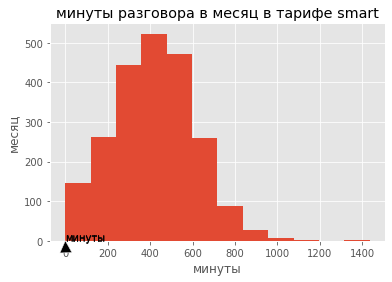

In [118]:
# Сколько минут разговора требуется пользователям каждого тарифа в месяц?
# построим гистограмму и проанализуем ее результаты
plt.style.use('ggplot')
df[df['tariff'] == 'smart']['sum_duration'].plot(kind='hist', bins=12)
plt.title('минуты разговора в месяц в тарифе smart')
plt.xlabel("минуты")
plt.ylabel("месяц")
plt.text(0.1, 0.2, "минуты")
plt.annotate("минуты", xy=(0.2, 0.4), xytext=(0.6, 0.7),
            arrowprops=dict(facecolor='black', shrink=0.05))

<div style="border:solid DarkCyan 3px; padding: 20px"> Наиболее частые (типичные, нормальные) значения оказываются посередине. А редкие — по краям. График симметричен и напоминает колокол. Такое распределение называется нормальным. Наиболее частые значения в минутах наблюдаются в отметке 450 минут, ближе к 500 мин. на графике идет спад. По условиям задачи в тариф смарт включено 500 минут разговора. Выходит, что большинство пользователей тарифа смарт укладываются в отведенные 500 мин или 8 час. 15 мин. разговора в месяц. Значит, что большинство пользователей укладываются в абоненсткую плату 550 рублей, вместе с тем есть выбивающиеся значения выходящие за пределы тарифа смарт. Гистограмма имеет смещение вправо,  как аналитик делаю вывод, что большинство потребителей Smart достаточно экономны, расчетливы. Вместе с тем треть пользователей  Smart выходят за пределы абонентской платы, следовательно осуществляют оплату за каждую минуту разговора 3 рубля.    
</div>

In [119]:
# минуты в часы
500/60

8.333333333333334

In [120]:
# ради эксперимента посмотрим сколько пользователей Смарт выходят за пределы абонентской платы
df_smart_dur = df[df['tariff'] == 'smart']['sum_duration']  > 500

In [121]:
# все кто False в пределах, все кто True отвечают интересам эксперимента
df_smart_dur.value_counts()

False    1475
True      754
Name: sum_duration, dtype: int64

<div style="border:solid DarkCyan 3px; padding: 20px"> 2022-02-07,  Выявлена интересная закономерность согласно которой 754 пользователей тарифа Smart выходят за пределы абонентской платы (здесь главное помнить, что 500 пользователей  могут иметь по несколько, например, сим карт с разными тарифами). Примерно 300 мин + приходится к допустимой норме по абонентской плате и мы можем полагать, что сумма переплаты составляет ориентировочно до 900 рублей, с абонентской платой это 1400 руб. Как аналитик данных я бы довел эту информацию до руководтства.
</div>

In [122]:
300 * 3

900

Text(0.6, 0.7, 'минуты')

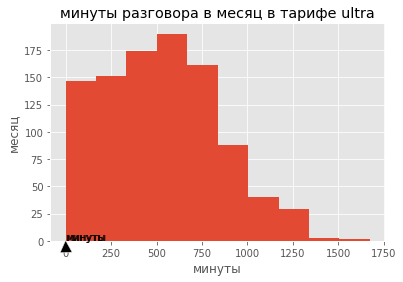

In [123]:
df[df['tariff'] == 'ultra']['sum_duration'].plot(kind='hist', bins=10)
plt.title('минуты разговора в месяц в тарифе ultra')
plt.xlabel("минуты")
plt.ylabel("месяц")
plt.text(0.1, 0.2, "минуты")
plt.annotate("минуты", xy=(0.2, 0.4), xytext=(0.6, 0.7),
            arrowprops=dict(facecolor='black', shrink=0.05))

In [124]:
# минуты в часы
3000/60

50.0

<div style="border:solid DarkCyan 3px; padding: 20px"> Видим нормальное распределение, со смещением значений данных влево. Наиболее частые значения в минутах наблюдаются в отметке 550 минут, ближе к 700 мин. на графике идет спад. По условиям задачи в тариф ультра включено 3000 минут разговора . Выходит, что большинство пользователей тарифа ультра укладываются в отведенные 3000 мин или 50 час. разговора в месяц. Следовательно большинство пользователей укладываются в абоненсткую плату 1950 рублей.
</div>

In [125]:
# посмотрим распределение пользователей по тарифам smart и ультра
df['tariff'].value_counts()

smart    2229
ultra     985
Name: tariff, dtype: int64

<div style="border:solid DarkCyan 3px; padding: 20px"> Видим, что количество пользователей smart - 2229 чел., ultra - 985 чел. Пользователей тарифа смарт значительно больше, более чем в два раза.
</div>

Boxplot(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f1ea31a9050>, lines={'whiskers': [<matplotlib.lines.Line2D object at 0x7f1ea3166a10>, <matplotlib.lines.Line2D object at 0x7f1ea3166f50>], 'caps': [<matplotlib.lines.Line2D object at 0x7f1ea3157dd0>, <matplotlib.lines.Line2D object at 0x7f1ea30f0990>], 'boxes': [<matplotlib.lines.Line2D object at 0x7f1ea3157d90>], 'medians': [<matplotlib.lines.Line2D object at 0x7f1ea30f0ed0>], 'fliers': [<matplotlib.lines.Line2D object at 0x7f1ea3166e90>], 'means': []})

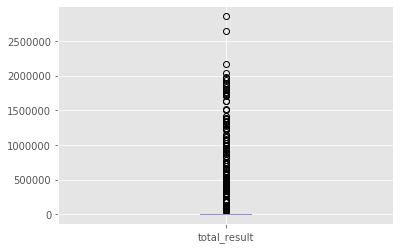

In [126]:
# Увидеть медиану и квартили в Python можно на специальном графике. Посмотрим с помощью диаграммы размаха на данные total_result
# тариф ультра
df[df['tariff'] == 'ultra']['total_result'].plot.box(return_type='both')

<div style="border:solid DarkCyan 3px; padding: 20px"> Не очень наглядно. Видно, что есть выбросы, однако на этом всё. Чтобы лучше разглядеть «ящик с усами», изменим масштаб графика.
</div>

(-500000, 3500000)

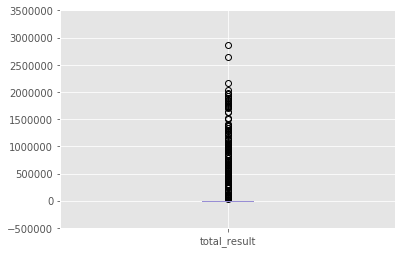

In [127]:
df[df['tariff'] == 'ultra']['total_result'].plot.box(return_type='both')
plt.ylim(-500000, 3500000)

<div style="border:solid DarkCyan 3px; padding: 20px"> изменения масштабов не дает результата, значит следует удалить выбросы, либо воспользоваться другим приемом представления.
</div>

In [128]:
# берем описательный метод describe()
df[df['tariff'] == 'ultra']['total_result'].describe()

count    9.850000e+02
mean     1.144558e+05
std      3.633981e+05
min      1.950000e+03
25%      1.950000e+03
50%      1.950000e+03
75%      1.950000e+03
max      2.855804e+06
Name: total_result, dtype: float64

Boxplot(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f1ea1bca490>, lines={'whiskers': [<matplotlib.lines.Line2D object at 0x7f1ea30d8b50>, <matplotlib.lines.Line2D object at 0x7f1ea30d8190>], 'caps': [<matplotlib.lines.Line2D object at 0x7f1ea30b9fd0>, <matplotlib.lines.Line2D object at 0x7f1ea1bbbb90>], 'boxes': [<matplotlib.lines.Line2D object at 0x7f1ea30b9690>], 'medians': [<matplotlib.lines.Line2D object at 0x7f1ea1bbb310>], 'fliers': [<matplotlib.lines.Line2D object at 0x7f1ea3235550>], 'means': []})

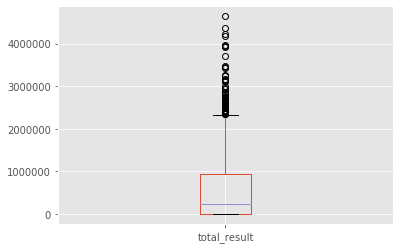

In [129]:
df[df['tariff'] == 'smart']['total_result'].plot.box(return_type='both')

In [130]:
df[df['tariff'] == 'smart']['total_result'].describe()

count    2.229000e+03
mean     5.518356e+05
std      7.188092e+05
min      5.500000e+02
25%      5.500000e+02
50%      2.299190e+05
75%      9.371360e+05
max      4.640660e+06
Name: total_result, dtype: float64

In [131]:
# сгруппируем тарифы по ключевым показателеям 'median','mean','var','std'
#  использую рекомендованное регулирование вывода, чтобы привести фрейм данных в порядок
df.groupby('tariff').agg({'total_result':['median','mean','var','std']}).style.format("{:.2f}")

<div style="border:solid DarkCyan 3px; padding: 20px"> ранее выявленная закономерность в рамках описательной статистики подтверждается, мы видим цифры, которые говорят, что в тарифе Смарт среднее-арифметическое значение  меньше медианы, это в свою очередь говорит о том, что имеется смещение влево, которое характеризует более экономное поведение пользователей тарифа. По тарифу Ультра обратная картина,  средние-арифметическое значение  больше медианы, это говорит о том, что имеется смещение вправо, которое характеризует более заинтересованное поведение пользователей тарифа в использовании продуктов тарифа. Как аналитик данных я бы предложил руководству компании обратить внимание на эту закономерность.  
</div> 

**Вопрос: сколько сообщений  требуется пользователям каждого тарифа в месяц**

Text(0.6, 0.7, 'шт')

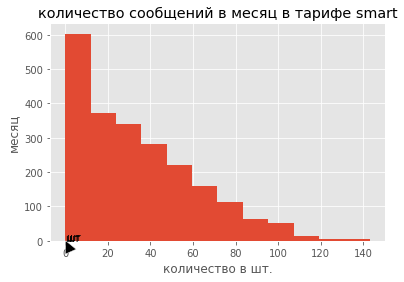

In [132]:
df[df['tariff'] == 'smart']['send_messages'].plot(kind='hist', bins=12)
plt.title('количество сообщений в месяц в тарифе smart')
plt.xlabel("количество в шт.")
plt.ylabel("месяц")
plt.text(0.1, 0.2, "шт")
plt.annotate("шт", xy=(0.2, 0.4), xytext=(0.6, 0.7),
            arrowprops=dict(facecolor='black', shrink=0.05))

<div style="border:solid DarkCyan 3px; padding: 20px"> По условию тарифа smart 50 сообщений входит в пакет, большинство пользователей тарифа smart отправляют не более 10 сообщений, далее по нисходящей. На графике виден хвост тех, кто отправляет больше 50 сообщений в месяц, следовательно данная часть потребителей тратят на сообщение 3 рубля. Например, те кто отправляет дополнительно 30 сообщений переплатят 90 рублей, 50 - 150 рублей, 90 это уже 270 рублей. 
</div> 

Text(0.6, 0.7, 'шт')

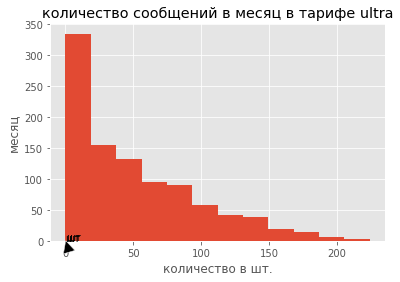

In [133]:
df[df['tariff'] == 'ultra']['send_messages'].plot(kind='hist', bins=12)
plt.title('количество сообщений в месяц в тарифе ultra')
plt.xlabel("количество в шт.")
plt.ylabel("месяц")
plt.text(0.1, 0.2, "шт")
plt.annotate("шт", xy=(0.2, 0.4), xytext=(0.6, 0.7),
            arrowprops=dict(facecolor='black', shrink=0.05))

<div style="border:solid DarkCyan 3px; padding: 20px"> Большинство пользователей тарифа ultra отправляют более 20 сообщений в месяц, но есть также существенная доля тех, кто отправляет до 120 сообщений. Вместе с тем для пользователей тарифа Ультра это совершенно не проблема,  1000 сообщений лимит по трафику, есть огромный запас.
</div> 

**Вопрос: какой объём интернет-трафика требуется пользователям каждого тарифа в месяц**

Text(0.6, 0.7, 'объем')

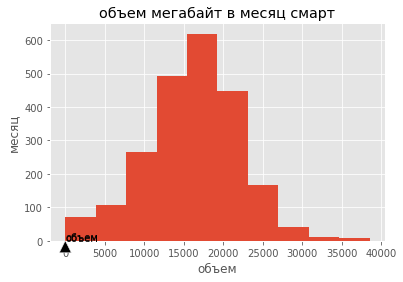

In [134]:
# изучим вопрос по тарифу смарт
df[df['tariff'] == 'smart']['mb_total'].plot(kind='hist', bins=10)
plt.title('объем мегабайт в месяц смарт')
plt.xlabel("объем")
plt.ylabel("месяц")
plt.text(0.1, 0.2, "объем")
plt.annotate("объем", xy=(0.2, 0.4), xytext=(0.6, 0.7),
            arrowprops=dict(facecolor='black', shrink=0.05))

<div style="border:solid DarkCyan 3px; padding: 20px"> Большинство пользователей тарифа смарт используют 17000 мб или 14 гб в месяц и укладываются в 15 Гб интернет-трафика в рамках абонентской платы, наблюдается скошенность влево, что свидетельствует о том, что потребители стремятся в основном следить за трафиком и не превышать его, но есть и другая, пусть и менее незначительная часть, которая выплачивает средства в размере 150 рублей за 1 гб, мы видим потребителей, которые переплачивают от 150 рублей до 2500 тыс рублей. Очевидно, что как аналитик данных я должен обратить внимание на данную закономерность коммерческий департамент, возможно при формировании рекламного бюджета стоит задуматься над вопросом предложения данным выбивающимся из трафика потребителям перейти на более выгодный для них тариф ультра, уже сейчас видно, что суммируя все сверх расходы по трафику выходит переплата может достигать выше 3 500 рублей! 
</div> 

In [135]:
17000/1200

14.166666666666666

In [136]:
17 * 150

2550

Text(0.6, 0.7, 'объем')

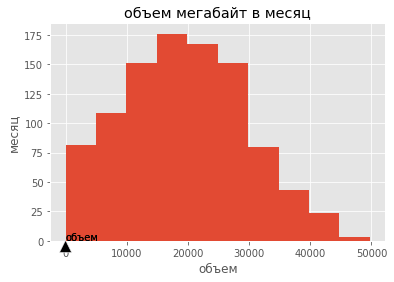

In [137]:
# изучим вопрос по тарифу ультра
df[df['tariff'] == 'ultra']['mb_total'].plot(kind='hist', bins=10)
plt.title('объем мегабайт в месяц')
plt.xlabel("объем")
plt.ylabel("месяц")
plt.text(0.1, 0.2, "объем")
plt.annotate("объем", xy=(0.2, 0.4), xytext=(0.6, 0.7),
            arrowprops=dict(facecolor='black', shrink=0.05))

<div style="border:solid DarkCyan 3px; padding: 20px"> Большинство пользователей тарифа ультра используют 19000 мб или  почти 15 гб в месяц и укладываются в 30 Гб интернет-трафика, значит около 15 гб остается в запасе как упущенные возможности. Данные ассиметричны, скошены вправо. Для скошенных вправо данных медиана будет меньше среднего. В правой части те, кто использует трафик ощутимо больше медианного значения. В данном случае поведеие пользователй показывает, что в тарифе «Ультра» пользователи больше тяготеют к пользованию трафиком. Спрос должен рождать предложение, в роли аналитика компании «Мегалайн» я предложил бы скорректировать рекламный бюджет в пользу тарифа «Ультра».
</div> 

In [138]:
19000/1200

15.833333333333334

**В завершении работы над данным разделом необходимо принять меры по отношению к вывленным аномалиям и выбросам, которые отчетливо видны в вышепредставленных диаграммах размаха**

In [139]:
# в достатоточно щадящем режиме обрежем аномалии (выбросы)
# 
q1 = df['total_result'].quantile(q=0.005)                 
q3 = df['total_result'].quantile(q=0.75)
df = df[(df['total_result'] < q3) & (df['total_result'] > q1)]

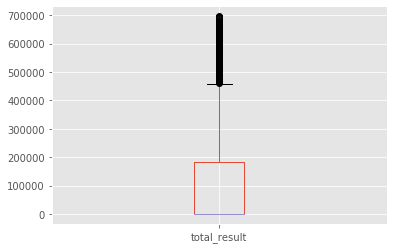

In [140]:
df['total_result'].plot(kind='box')
plt.show()

Boxplot(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f1f0797e910>, lines={'whiskers': [<matplotlib.lines.Line2D object at 0x7f1f079577d0>, <matplotlib.lines.Line2D object at 0x7f1f07957d90>], 'caps': [<matplotlib.lines.Line2D object at 0x7f1f0794cbd0>, <matplotlib.lines.Line2D object at 0x7f1f078de7d0>], 'boxes': [<matplotlib.lines.Line2D object at 0x7f1f0794cb90>], 'medians': [<matplotlib.lines.Line2D object at 0x7f1f078ded10>], 'fliers': [<matplotlib.lines.Line2D object at 0x7f1f07957e10>], 'means': []})

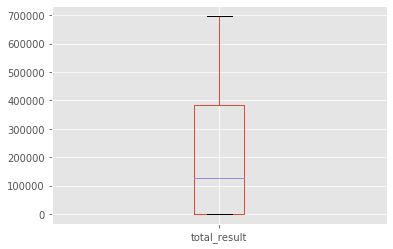

In [141]:
# посмотрим как отразилось удвление аномалий на выбросах в выручке тарифа smart
df[df['tariff'] == 'smart']['total_result'].plot.box(return_type='both')

<div style="border:solid DarkCyan 3px; padding: 20px"> Стало заметно лучше.</div> 

(0, 800000)

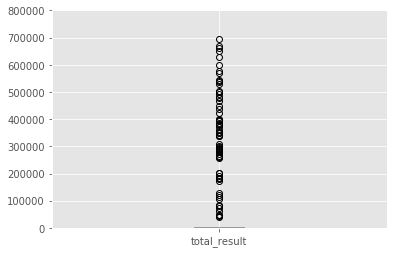

In [142]:
df[df['tariff'] == 'ultra']['total_result'].plot.box(return_type='both')
plt.ylim(0, 800000)

<div style="border:solid DarkCyan 3px; padding: 20px"> Стало получше, отсекли хвост, раньше выбросов было значительно больше.</div> 

## Проверка гипотез

#### Условия задач по разделу:
- средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются

*Пороговое значение alpha задайте самостоятельно.
Поясните:
как вы формулировали нулевую и альтернативную гипотезы;
какой критерий использовали для проверки гипотез и почему.*

**Проверка гипотез начинается с формулировки нулевой гипотезы H₀:**
- средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются.

**Исходя из H₀ формулируется альтернативная гипотеза H₁ (утверждение, которое принимается верным, если отбрасывается H₀):**
- средняя выручка пользователей тарифов «Ультра» и «Смарт» НЕ различаются.

*Такая альтернативная гипотеза называется двусторонней, потому что есть возможное отклонение и в большую, и в меньшую стороны.* 

*В Python есть специальный метод для проверки гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам: scipy.stats.ttest_ind (array1, array2,equal_var). Для корректного использования t-теста equal_var необязательно.*

In [143]:
# создадим для проведения проверки гипотез специальные переменные со сзначениями 
# выручки пользователей тарифов «Ультра» и «Смарт»
smart_1 = df[df['tariff'] == 'smart']['total_result']

In [144]:
ultra_1  = df[df['tariff'] == 'ultra']['total_result']

In [145]:
# обозначим значение альфы согласно общепринятым пороговым значениям
# критический уровень статистической значимости
alpha = .05
results = st.ttest_ind(ultra_1, smart_1)

In [146]:
print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 8.272202813452664e-96
Отвергаем нулевую гипотезу


<div style="border:solid DarkCyan 3px; padding: 20px"> Проверка гипотезы сообщает, что средняя выручка пользователей тарифов «Ультра» и «Смарт» НЕ различаются. </div> 

#### Условия задач по разделу:
- средняя выручка пользователи из Москвы отличается от выручки пользователей из других регионов

**Проверка гипотез начинается с формулировки нулевой гипотезы H₀:**
- средняя выручка пользователи из Москвы отличается от выручки пользователей из других регионов

**Исходя из H₀ формулируется альтернативная гипотеза H₁ (утверждение, которое принимается верным, если отбрасывается H₀):**
- средняя выручка пользователи из Москвы не отличается от выручки пользователей из других регионов

In [147]:
# для решения данной задачи необходимо построить все уникальные значения в столбце city фрейма данных df
df['city'].unique()

array(['Краснодар', 'Москва', 'Стерлитамак', 'Новокузнецк',
       'Набережные Челны', 'Ульяновск', 'Челябинск', 'Пермь', 'Тюмень',
       'Самара', 'Санкт-Петербург', 'Иваново', 'Омск', 'Уфа', 'Томск',
       'Чита', 'Мурманск', 'Тверь', 'Екатеринбург', 'Махачкала',
       'Вологда', 'Ярославль', 'Сочи', 'Ставрополь', 'Рязань', 'Улан-Удэ',
       'Тула', 'Ростов-на-Дону', 'Казань', 'Иркутск', 'Курск', 'Калуга',
       'Якутск', 'Астрахань', 'Химки', 'Владикавказ', 'Волгоград',
       'Саранск', 'Череповец', 'Ижевск', 'Новосибирск', 'Брянск',
       'Тольятти', 'Нижний Тагил', 'Орёл', 'Петрозаводск', 'Белгород',
       'Воронеж', 'Курган', 'Барнаул', 'Красноярск', 'Архангельск',
       'Кемерово', 'Сургут', 'Пенза', 'Волжский', 'Магнитогорск',
       'Нижний Новгород', 'Кострома', 'Владивосток', 'Тамбов',
       'Чебоксары', 'Балашиха', 'Севастополь', 'Калининград', 'Киров',
       'Оренбург', 'Смоленск', 'Хабаровск', 'Нижневартовск', 'Владимир',
       'Новороссийск', 'Саратов', 'Гроз

In [148]:
df['city'].value_counts()

Москва             363
Санкт-Петербург    125
Краснодар           68
Уфа                 57
Новосибирск         56
                  ... 
Химки                2
Липецк               2
Владикавказ          2
Иваново              2
Якутск               1
Name: city, Length: 76, dtype: int64

<div style="border:solid DarkCyan 3px; padding: 20px"> В нашем внимании 75 городов, кроме Москвы. Для проведения расчетов нам нужнен массив данных Москвы и массив данных прочих городов. Для решения задачи можно создать отдельный датафрейм moscow, заменить значения в столбце city на subject и оставить название всем значениям Москва без изменений, при этом наимнования других городов заменим на прочие города, далее вскормим массивы в специальные формулы для провекри гипотез. </div> 

In [149]:
# создаю отдельный датафрейм df_moscow
df_moscow = df

In [150]:
df_moscow['subject'] = np.where(df_moscow['city'] == 'Москва','Москва', 'Прочие города') 

In [151]:
df_moscow['subject'].tail()

3207    Прочие города
3209    Прочие города
3211    Прочие города
3212    Прочие города
3213           Москва
Name: subject, dtype: object

In [152]:
moscow = df_moscow[df_moscow['subject'] == 'Москва']

In [153]:
moscow = moscow['total_result']

In [154]:
other_cities = df_moscow[df_moscow['subject'] == 'Прочие города']

In [155]:
other_cities = other_cities ['total_result']

In [156]:
results_1 = st.ttest_ind(moscow, other_cities)

In [157]:
print('p-значение:', results_1.pvalue)

if (results_1.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.22494265507956263
Не получилось отвергнуть нулевую гипотезу


<div style="border:solid DarkCyan 3px; padding: 20px"> Результат проверки гипотезы свидетельствует, что средняя выручка пользователи из Москвы отличается от выручки пользователей из других регионов </div> 

## Общий вывод

 **В роли аналитика компании «Мегалайн» — федерального оператора сотовой связи, я подготовил следующую информацию по рекламному бюджету в коммерческий департамент (который хочет понять, какой тариф приносит больше денег):**
 
 - Наблюдения данных происходили с 00:00:00 2018-01-01 по 00:00:00 2018-12-31, другими словами 365 дней (в течение 2018 года);
 - Большинство пользователей тарифа смарт укладываются в отведенные 500 мин или 8 час. 15 мин. разговора в месяц. Значит, что большинство пользователей укладываются в абоненсткую плату 550 рублей, вместе с тем есть выбивающиеся значения выходящие за пределы тарифа смарт. Гистограмма имеет смещение вправо, как аналитик делаю вывод, что большинство потребителей Smart достаточно экономны, расчетливы. Вместе с тем треть пользователей Smart выходят за пределы абонентской платы, следовательно они готовы инвестировать за каждую минуту разговора 3 рубля;
 - интересная выявлена закономерность согласно которой 754 пользователей тарифа Smart выходят за пределы абонентской платы (здесь главное помнить, что 500 пользователей могут иметь по несколько, например, сим карт с разными тарифами). Примерно 300 мин приходится плюсом к допустимой норме по абонентской плате и мы можем полагать, что сумма переплаты составляет ориентировочно до 900 рублей, с абонентской платой это 1400 руб. Как аналитик данных я бы довел эту информацию до руководтства. Похоже многие из тарифа Смарт охотно согласятся не переплачивать и восопльзоваться более большими ресурсами тарифа ultra;
- в тарифе ultra видим нормальное распределение, со смещением значений данных влево. Наиболее частые значения в минутах наблюдаются в отметке 550 минут, ближе к 700 мин. на графике идет спад. По условиям задачи в тариф ультра включено 3000 минут разговора . Выходит, что большинство пользователей тарифа ультра укладываются в отведенные 3000 мин или 50 час. разговора в месяц. Следовательно большинство пользователей укладываются в абоненсткую плату 1950 рублей;
- по условию тарифа smart 50 сообщений входит в пакет, большинство пользователей тарифа smart отправляют не более 10 сообщений, далее количество пользователей падает, количество сообщений растет. На графике виден хвост тех, кто отправляет больше 50 сообщений в месяц, следовательно данная часть потребителей тратят на сообщение 3 рубля. Например, те кто отправляет дополнительно 30 сообщений переплатят 90 рублей, 50 - 150 рублей, 90 это уже 270 рублей;
- большинство пользователей тарифа ultra отправляют более 20 сообщений в месяц, но есть также существенная доля тех, кто отправляет до 120 сообщений. Вместе с тем для пользователей тарифа Ультра это совершенно не проблема, 1000 сообщений лимит по трафику, есть огромный запас;
- большинство пользователей тарифа смарт используют 17000 мб или 14 гб в месяц и укладываются в 15 Гб интернет-трафика в рамках абонентской платы, наблюдается скошенность влево, что свидетельствует о том, что потребители стремятся в основном следить за трафиком и не превышать его, но есть и другая, пусть и менее незначительная часть, которая выплачивает средства в размере 150 рублей за 1 гб, мы видим потребителей, которые переплачивают от 150 рублей до 2500 тыс рублей. Очевидно, что как аналитик данных я должен обратить внимание коммерческого департаментна на данную закономерность , возможно при формировании рекламного бюджета стоит задуматься над вопросом предложения данным выбивающимся из трафика потребителям перейти на более выгодный для них тариф ультра, уже сейчас видно, что суммируя все сверх расходы по трафику Smart выходит переплата может достигать выше 3 500 рублей!!!
- большинство пользователей тарифа ультра используют 19000 мб или почти 15 гб в месяц и укладываются в 30 Гб интернет-трафика, значит около 15 гб остается в запасе как упущенные возможности. Данные ассиметричны, скошены вправо. Для скошенных вправо данных медиана будет меньше среднего. В правой части те, кто использует трафик ощутимо больше медианного значения. В данном случае поведение пользователй показывает, что в тарифе «Ультра» пользователи больше тяготеют к пользованию трафиком. Спрос должен рождать предложение, в роли аналитика компании «Мегалайн» я предложил бы скорректировать рекламный бюджет в пользу тарифа «Ультра»;
- при условии, что гипотеза средняя выручка пользователей тарифов «Ультра» и «Смарт» НЕ различаются - верна, мои предложения в части необходимости инветирования бюджета в рекламную компанию Ультра увеличиваются, поскольку лучше платить 1990 руб ежемесячно, чем переплачивать в три раза больше 550 рублей в Смарте, постоянно ограничивая себя.
- при условии, что гипотеза средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов - верна, я делаю вывод, что с большой вероятностью московский рынок мог бы стать хорошей экспериментальной площадкой для прокатки вопроса инвестирования бюджета в рекламную компанию тарифа "Ультра" с учетом ранее отмеченных преимуществ тарифа относительно его конкурента Смарт.
 